In [1]:
import scanpy as sc
import gdown
import h5py
import numpy as np
from mofapy2.run.entry_point import entry_point

# MOFA 2

## Load the dataset

In [2]:
!wget "https://hmgubox2.helmholtz-muenchen.de/index.php/s/r2W5dMJdq6mFMZY/download?path=%2Fhao-2020&files=expressions.h5ad" -O hao2020-expressions.h5ad

--2021-03-02 09:12:05--  https://hmgubox2.helmholtz-muenchen.de/index.php/s/r2W5dMJdq6mFMZY/download?path=%2Fhao-2020&files=expressions.h5ad
Resolving hmgubox2.helmholtz-muenchen.de (hmgubox2.helmholtz-muenchen.de)... 146.107.5.51
Connecting to hmgubox2.helmholtz-muenchen.de (hmgubox2.helmholtz-muenchen.de)|146.107.5.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1949492332 (1.8G) [application/octet-stream]
Saving to: 'hao2020-expressions.h5ad'

100%[====================================>] 1,949,492,332 30.8MB/s   in 61s    

2021-03-02 09:13:07 (30.4 MB/s) - 'hao2020-expressions.h5ad' saved [1949492332/1949492332]



In [3]:
scrna = sc.read('../data/hao-2020/expressions_hvg.h5ad')
scrna

AnnData object with n_obs × n_vars = 149926 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [3]:
scrna = sc.read('hao2020-expressions.h5ad')
scrna

AnnData object with n_obs × n_vars = 161764 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'cell_type'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'neighbors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    layers: 'count'
    obsp: 'distances'

In [4]:
scrna1 = scrna[scrna.obs['Batch'] == 'Batch1']
scrna2 = scrna[scrna.obs['Batch'] == 'Batch2']

In [5]:
scrna1

View of AnnData object with n_obs × n_vars = 64344 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [6]:
scrna2

View of AnnData object with n_obs × n_vars = 85582 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
!wget "https://hmgubox2.helmholtz-muenchen.de/index.php/s/r2W5dMJdq6mFMZY/download?path=%2Fhao-2020&files=protein.h5ad" -O hao2020-proteins.h5ad

--2021-03-02 09:13:30--  https://hmgubox2.helmholtz-muenchen.de/index.php/s/r2W5dMJdq6mFMZY/download?path=%2Fhao-2020&files=protein.h5ad
Resolving hmgubox2.helmholtz-muenchen.de (hmgubox2.helmholtz-muenchen.de)... 146.107.5.51
Connecting to hmgubox2.helmholtz-muenchen.de (hmgubox2.helmholtz-muenchen.de)|146.107.5.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 904554908 (863M) [application/octet-stream]
Saving to: 'hao2020-proteins.h5ad'

100%[======================================>] 904,554,908 30.8MB/s   in 28s    

2021-03-02 09:13:59 (30.7 MB/s) - 'hao2020-proteins.h5ad' saved [904554908/904554908]



In [8]:
cite = sc.read('../data/hao-2020/protein.h5ad')
cite

AnnData object with n_obs × n_vars = 149926 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [5]:
cite = sc.read_h5ad('hao2020-proteins.h5ad')
cite

AnnData object with n_obs × n_vars = 161764 × 224
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'cell_type'
    var: 'features'
    uns: 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'APCA'
    layers: 'count'

In [9]:
cite1 = cite[cite.obs['Batch'] == 'Batch1']
cite2 = cite[cite.obs['Batch'] == 'Batch2']

In [10]:
cite1

View of AnnData object with n_obs × n_vars = 64344 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [11]:
cite2

View of AnnData object with n_obs × n_vars = 85582 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

## Configure and train the model

In [12]:
ent = entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [13]:
ent.set_data_options(
    scale_groups = False, 
    scale_views = False
)

In [14]:
ent.set_data_matrix(
    [[scrna1.X.A, scrna2.X.A], [cite1.X, cite2.X]],
    views_names=['scRNA', 'scADT'],
    groups_names=['batch_1', 'batch_2']
)

Features names not provided, using default naming convention:
- feature1_view1, featureD_viewM

Samples names not provided, using default naming convention:
- sample1_group1, sample2_group1, sample1_group2, ..., sampleN_groupG

Successfully loaded view='scRNA' group='batch_1' with N=64344 samples and D=4000 features...
Successfully loaded view='scRNA' group='batch_2' with N=85582 samples and D=4000 features...
Successfully loaded view='scADT' group='batch_1' with N=64344 samples and D=228 features...
Successfully loaded view='scADT' group='batch_2' with N=85582 samples and D=228 features...




In [15]:
ent.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)

Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (scRNA): gaussian
- View 1 (scADT): gaussian




In [16]:
ent.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = False, 
    verbose = False, 
    seed = 1
)

Consider training the model with set drop_factor_threshold = -1 and prune them a posteriori


In [17]:
ent.build()

In [18]:
ent.run()



######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -766692866.29 

Iteration 1: time=1091.43, ELBO=951321053.87, deltaELBO=1718013920.156 (224.08111458%), Factors=19
Iteration 2: time=1055.13, ELBO=1002691361.73, deltaELBO=51370307.855 (6.70024597%), Factors=18
Iteration 3: time=1014.15, ELBO=1010932662.26, deltaELBO=8241300.533 (1.07491551%), Factors=17
Iteration 4: time=985.32, ELBO=1012615587.26, deltaELBO=1682925.005 (0.21950446%), Factors=17
Iteration 5: time=996.53, ELBO=1013190830.25, deltaELBO=575242.991 (0.07502913%), Factors=17
Iteration 6: time=1002.84, ELBO=1013611044.48, deltaELBO=420214.229 (0.05480868%), Factors=17
Iteration 7: time=1017.65, ELBO=1013892605.27, deltaELBO=281560.791 (0.03672407%), Factors=17
Iteration 8: time=990.78, ELBO=1013995811.19, deltaELBO=103205.918 (0.01346118%), Factors=17
Iteration 9: time=995.98, ELBO=1014036054.83, deltaELBO=40243.641 (0.00524899%), Fact

In [19]:
outfile = 'hao2020-mofa.hdf5'
ent.save(outfile)

Saving model in hao2020-mofa.hdf5...


## Save results as AnnData

In [20]:
f = h5py.File(outfile)

In [21]:
z = np.concatenate([v[:,:] for k, v in f['expectations']['Z'].items()], axis=1).T
z = sc.AnnData(z)

z.obs_names = scrna.obs_names
z.obs = scrna.obs

z

AnnData object with n_obs × n_vars = 149926 × 17
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'

In [22]:
z.write('../data/integrated/mofa/hao-mofa.h5ad')

## Remove old files

In [23]:
!rm 'hao2020-expressions.h5ad'
!rm 'hao2020-proteins.h5ad'
!rm 'hao2020-mofa.hdf5'

rm: cannot remove 'hao2020-expressions.h5ad': No such file or directory
rm: cannot remove 'hao2020-proteins.h5ad': No such file or directory


## Visualize results

In [24]:
sc.pp.neighbors(z)
sc.tl.umap(z)

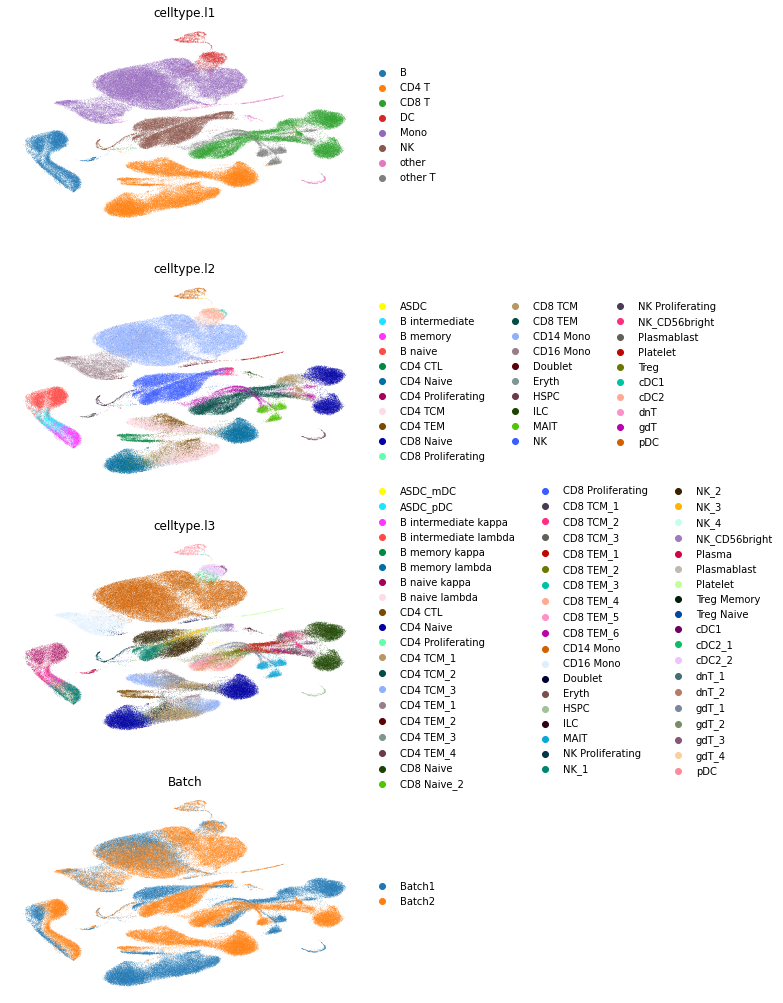

In [25]:
sc.pl.umap(z, color=['celltype.l1', 'celltype.l2', 'celltype.l3', 'Batch'], ncols=1, frameon=False)